# Scratchbook

## Imports

In [1]:
from torchvision import models
from torchvision import transforms
import PIL.Image as Image
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

## Model

In [2]:
# Instanciate the model
model = models.vgg19()

## Data

In [3]:
img = Image.open("./examples/pebbles.jpg")

In [4]:
# Preprocess the image so that it can be fed to the network
preprocess = transforms.Compose([
   transforms.Resize(256),
   transforms.CenterCrop(224),
   transforms.ToTensor(),
   #normalize
])

In [5]:
img_tensor = preprocess(img)
# ``unsqueeze_`` means the transformation is made inplace
# Here unsqueeze enables us to create a batch of 1 image
img_tensor.unsqueeze_(0)

tensor([[[[0.7059, 0.7529, 0.7765,  ..., 0.8118, 0.8353, 0.8314],
          [0.6863, 0.7647, 0.7961,  ..., 0.7765, 0.7882, 0.7686],
          [0.7137, 0.7686, 0.7725,  ..., 0.7882, 0.7765, 0.7529],
          ...,
          [0.7176, 0.7255, 0.6863,  ..., 0.1373, 0.1451, 0.1529],
          [0.5882, 0.6157, 0.6000,  ..., 0.1333, 0.1373, 0.1333],
          [0.4627, 0.5137, 0.5255,  ..., 0.1333, 0.1255, 0.1176]],

         [[0.7216, 0.7412, 0.7373,  ..., 0.8353, 0.8510, 0.8471],
          [0.7020, 0.7529, 0.7569,  ..., 0.7922, 0.7843, 0.7647],
          [0.7255, 0.7451, 0.7333,  ..., 0.7882, 0.7569, 0.7294],
          ...,
          [0.6431, 0.6510, 0.6314,  ..., 0.1529, 0.1686, 0.1765],
          [0.5098, 0.5412, 0.5451,  ..., 0.1725, 0.1765, 0.1765],
          [0.3765, 0.4392, 0.4706,  ..., 0.1765, 0.1765, 0.1686]],

         [[0.7647, 0.7843, 0.7804,  ..., 0.8353, 0.8627, 0.8588],
          [0.7373, 0.7961, 0.7922,  ..., 0.7961, 0.8039, 0.7843],
          [0.7529, 0.7843, 0.7686,  ..., 0

## Refactoring

In [6]:
def get_output_from_layer(model, base_img_path, layer_id):
    """
    Get the features maps outputs from any layer
    using a forward pass from a base image
    in a VGG model
    
    Parameters
    ------------
    - model : torchvision.models.vgg.VGG
        Model to be investigated
        
    - base_img_path : string
        Path of the image to be used as input
        
    - layer_id : int
        Layer Number.
        Validity range: 0 - 36 (included)
        See ``model._modules['features']``
        for more details
        
    Returns
    ------------
    - layer_output : numpy.ndarray
        Array of features maps activations
    """
    if not layer_id in np.arange(0, 37):
        raise ValueError("``layer_id`` argument invalid.  "
                         f"Got: {layer_id}.  "
                         "Expected a value between 0 and 36 included.  ")
    
    
    # Create an empty list
    features_blobs = list()

    # Create hook to dump features maps into the list created above
    def hook_feature(module, input, output): 
        features_blobs.append(output.data.cpu().numpy())
        #features_blobs.append(output.grad.data.cpu().numpy())
        
    # Get model features
    features = model._modules["features"]
    # We can hook any layer from above
    features._modules.get(str(layer_id)).register_forward_hook(hook_feature);
    #features._modules.get(str(layer_id)).register_backward_hook(hook_feature);
    
    # Load image
    img = Image.open(base_img_path)
    plt.imshow(img)
    
    # Preprocess the image so that it can be fed to the network
    preprocess = transforms.Compose([
       transforms.Resize(256),
       transforms.CenterCrop(224),
       transforms.ToTensor(),
       #normalize
    ])
    img_tensor = preprocess(img)
    img_tensor = img_tensor.unsqueeze(0)
    
    input_img = Variable(torch.zeros(img_tensor.size()).type_as(img_tensor.data), requires_grad=True)
    print(input_img.grad)
    # Capture the features outputs at the layer given above
    model.forward(input_img)
    print(input_img.grad) # Why does it output None here?
    layer_output = np.array(features_blobs[0])
    
    return layer_output

None
None


array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
    

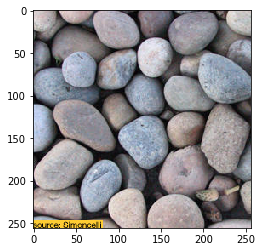

In [7]:
layer_output = get_output_from_layer(model=model, base_img_path="./examples/pebbles.jpg", layer_id=5)
layer_output

## TODO:

* Texture synthesis pseudo-code
  * Generate a ranVGG instance (right now we ignore the construction step)
  * Compute the gram matrix of an image at any layer l
  * Backpropagate all the way to the image input layer
* Texture synthesis implementation

## Rubbish

In [3]:
# Create an empty list
features_blobs = list()

# Create hook to dump features maps into the list created above
def hook_feature(module, input, output): 
    features_blobs.append(output.data.cpu().numpy())

In [4]:
# Get model features
features = model._modules["features"]
features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace)
  (18): MaxPool2d(kernel_size=2, stride=2, padding=0, 

In [5]:
classifier = model._modules["classifier"]
classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace)
  (2): Dropout(p=0.5)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace)
  (5): Dropout(p=0.5)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [6]:
# We can hook any layer from above
features._modules.get('0').register_forward_hook(hook_feature);

In [ ]:
# Create an empty list
features_blobs = list()

# Create hook to dump features maps into the list created above
def hook_feature(module, input, output): 
    features_blobs.append(output.data.cpu().numpy())
    #features_blobs.append(output.grad.data.cpu().numpy())

# Get model features
features = model._modules["features"]
# We can hook any layer from above
features._modules.get(str(layer_id)).register_forward_hook(hook_feature);
#features._modules.get(str(layer_id)).register_backward_hook(hook_feature);

# Load image
img = Image.open(base_img_path)
plt.imshow(img)

# Preprocess the image so that it can be fed to the network
preprocess = transforms.Compose([
   transforms.Resize(256),
   transforms.CenterCrop(224),
   transforms.ToTensor(),
   #normalize
])
img_tensor = preprocess(img)
img_tensor = img_tensor.unsqueeze(0)

input_img = Variable(torch.zeros(img_tensor.size()).type_as(img_tensor.data), requires_grad=True)
print(input_img.grad)
# Capture the features outputs at the layer given above
model.forward(input_img)
print(input_img.grad) # Why does it output None here?
layer_output = np.array(features_blobs[0])

layer_output

## Gradient hooking trial

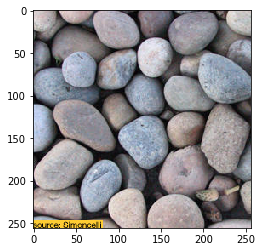

In [3]:
# Load image
img = Image.open("./examples/pebbles.jpg")
plt.imshow(img);

In [4]:
# Preprocess the image so that it can be fed to the network
preprocess = transforms.Compose([
   transforms.Resize(256),
   transforms.CenterCrop(224),
   transforms.ToTensor(),
   #normalize
])
img_tensor = preprocess(img)
img_tensor = img_tensor.unsqueeze(0)

In [5]:
img_tensor.shape

torch.Size([1, 3, 224, 224])

In [6]:
input_img = Variable(torch.zeros(img_tensor.size()).type_as(img_tensor.data), requires_grad=True)
#model.zero_grad()
output = model(input_img)
g = torch.zeros(1, 10, 3, 224, 224)
for i in range(10):
    g[:, i] = torch.autograd.grad(output[:, i].sum(), input_img, retain_graph=True)[0].data
print(g)

tensor([[[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]],

          [[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]],

          [[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],


         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  